# AIRLINES DATASET
Using the above dataset to do time series forecasting.

## BUSINESS OBJECTIVE
* Maximize Profit
* Minimize Empty planes
* Maximize Service Quality
* Maximize Popularity

## CONSTRAINTS
* Fuel Prices
* Conflicts 
* Low Traffic


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                                                          | **Type** | **Relevance** |
|:--------:|:-------------------|:--------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | Month | It gives the date | Nominal   | Relevant      |
| 2 | Passengers | The number of passengers in the  month | Ratio   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_excel(r"D:\360Digitmg\ASSIGNMENTS\Ass28\Airlines Data.xlsx")
df=df0.copy()
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


### DATA UNDERSTANDING & PREPROCESSING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(96, 2)

In [4]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Month         0
Passengers    0
dtype: int64


Using the dt.month_name function from pandas to get the month name from the Month variable and saving the names to newly created variable called months

In [9]:
df['months'] = df['Month'].dt.month_name(locale='English')
df.head(5)

,Month,Passengers,months
0,1995-01-01,112,January
1,1995-02-01,118,February
2,1995-03-01,132,March
3,1995-04-01,129,April
4,1995-05-01,121,May


Checking the number of unique values in each variable. 

In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Month         96
Passengers    80
months        12
dtype: int64


creating a column t for time index , t_square for squared time index & log_passengers for building exponential model

In [11]:
df["t"] = np.arange(1,97)
df["t_square"] = df["t"] * df["t"]
df["log_Passengers"] = np.log(df["Passengers"])
df.head(5)

,Month,Passengers,months,t,t_square,log_Passengers
0,1995-01-01,112,January,1,1,4.718499
1,1995-02-01,118,February,2,4,4.770685
2,1995-03-01,132,March,3,9,4.882802
3,1995-04-01,129,April,4,16,4.859812
4,1995-05-01,121,May,5,25,4.795791


Creating dummy variables of the months variable. 

In [12]:
month_dummies = pd.DataFrame(pd.get_dummies(df['months']))
df1 = pd.concat([df, month_dummies], axis = 1)
df1.head(5)

,Month,Passengers,months,t,t_square,log_Passengers,April,August,December,February,January,July,June,March,May,November,October,September
0,1995-01-01,112,January,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,February,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,March,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,April,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


Creating a new dataframe which would be used to forecast the data for the next 5 Years(60 months). 

In [13]:
df_new = df1.iloc[0:60,:] 
df_new.drop(['Month','Passengers','months','t','t_square','log_Passengers'],axis=1,inplace=True)
df_new["t"] = np.arange(97,157)
df_new["t_square"] = df_new["t"] * df_new["t"]
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_33980\2169265344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Month','Passengers','months','t','t_square','log_Passengers'],axis=1,inplace=True)
C:\Users\lenny\AppData\Local\Temp\ipykernel_33980\2169265344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["t"] = np.arange(97,157)
C:\Users\lenny\AppData\Local\Temp\ipykernel_33980\2169265344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,April,August,December,February,January,July,June,March,May,November,October,September,t,t_square
0,0,0,0,0,1,0,0,0,0,0,0,0,97,9409
1,0,0,0,1,0,0,0,0,0,0,0,0,98,9604
2,0,0,0,0,0,0,0,1,0,0,0,0,99,9801
3,1,0,0,0,0,0,0,0,0,0,0,0,100,10000
4,0,0,0,0,0,0,0,0,1,0,0,0,101,10201


In [14]:
df_new.tail()

,April,August,December,February,January,July,June,March,May,November,October,September,t,t_square
55,0,1,0,0,0,0,0,0,0,0,0,0,152,23104
56,0,0,0,0,0,0,0,0,0,0,0,1,153,23409
57,0,0,0,0,0,0,0,0,0,0,1,0,154,23716
58,0,0,0,0,0,0,0,0,0,1,0,0,155,24025
59,0,0,1,0,0,0,0,0,0,0,0,0,156,24336


### VISUALIZATION - TIME PLOT
Plotting the time plot. 

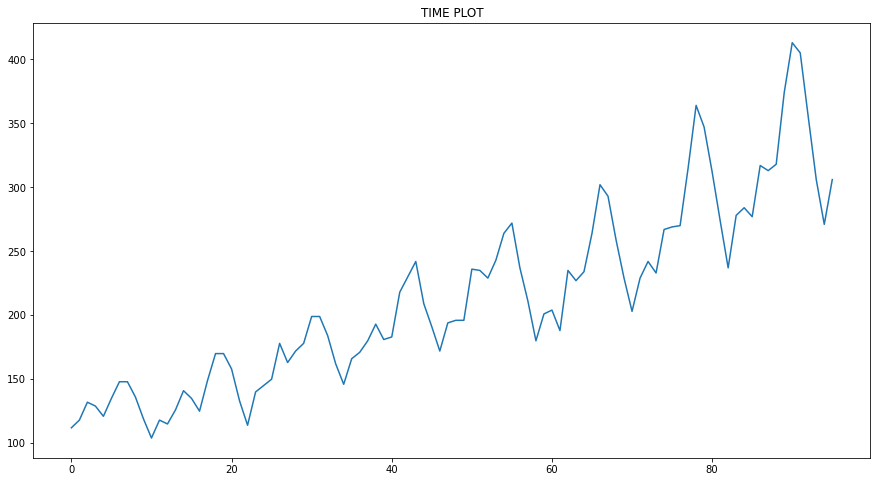

In [15]:
plt.figure(figsize=(15,8))
df1.Passengers.plot()
plt.title("TIME PLOT")
plt.show()

From the time plot we can see that it has an upwards with seasonality but type of seasonality is difficult to guess

### DATA PARTITION
Partioning the data into train and test data. 

In [16]:
Train = df1.head(60)
Test = df1.tail(36)

### MODEL BUILDING

__TESTING DIFFERENT MODELS__

Importing the library required for building the model.

In [17]:
import statsmodels.formula.api as smf 

__Linear Model__

In [18]:
linear_model = smf.ols('Passengers ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_linear))**2))
rmse_linear

44.35662671788456

__Exponential Model__

In [19]:
Exp = smf.ols('log_Passengers ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.9119964769827

__Quadratic Model__

In [20]:
Quad = smf.ols('Passengers ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_Quad))**2))
rmse_Quad

40.31203210939923

__Additive Seasonality__

In [21]:
add_sea = smf.ols('Passengers ~ January+February+March+April+May+June+July+August+September+October+November+December', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_add_sea))**2))
rmse_add_sea

119.97073717276962

__Multiplicative Seasonality__

In [22]:
Mul_sea = smf.ols('log_Passengers ~ January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

123.66785534535848

__Additive Seasonality with Linear Trend__

In [23]:
add_sea_lin = smf.ols('Passengers ~ t+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December','t']]))
rmse_add_sea_lin = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_lin))**2))
rmse_add_sea_lin 

29.49606376752293

__Additive Seasonality with Quadratic Trend__

In [24]:
add_sea_Quad = smf.ols('Passengers ~ t+t_square+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

25.49269369204702

__Multiplicative Seasonality with Linear Trend__

In [25]:
Mul_Add_sea = smf.ols('log_Passengers ~ t+January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

26.10038046956047

__Multiplicative Seasonality with Quadratic Trend__

In [26]:
Mul_Add_sea_quad = smf.ols('log_Passengers ~ t+t_square+January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad 

29.467425622600885

__MODEL COMPARISONS__

In [27]:
data = {"MODEL":pd.Series(["Linear Model RMSE","Exponential Model RMSE","Quadratic Model RMSE","Additive Seasonality Model RMSE","Additive Seasonality with Linear Trend RMSE","Additive Seasonality with Quadratic Trend RMSE","Multiplicative Seasonality Model RMSE","Multiplicative Seasonality with Linear Trend RMSE","Multiplicative Seasonality with Quadratic Trend RMSE"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_lin,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mult_add_sea_quad])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,Linear Model RMSE,44.356627
1,Exponential Model RMSE,42.911996
2,Quadratic Model RMSE,40.312032
3,Additive Seasonality Model RMSE,119.970737
4,Additive Seasonality with Linear Trend RMSE,29.496064
5,Additive Seasonality with Quadratic Trend RMSE,25.492694
6,Multiplicative Seasonality Model RMSE,123.667855
7,Multiplicative Seasonality with Linear Trend RMSE,26.100380
8,Multiplicative Seasonality with Quadratic Tren...,29.467426


On comparison of the different models the Additive Seasonality with Quadratic Trend Model is giving the lowest RMSE value so using this model for Model building

__BUILDING THE MODEL AND FORECASTING__

Building the model on the entire dataset. 

In [28]:
full_model = smf.ols('Passengers ~ t+t_square+January+February+March+April+May+June+July+August+September+October+November+December', data=df1).fit()

Forecasting the data for the next 60 months using the best model i.e. Additive Seasonality with Quadratic Trend.The forecasted data is stored in the variable 'Passengers'.

In [29]:
df_new['Passengers']=pd.Series(full_model.predict(df_new))
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_33980\3344907635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Passengers']=pd.Series(full_model.predict(df_new))


,April,August,December,February,January,July,June,March,May,November,October,September,t,t_square,Passengers
0,0,0,0,0,1,0,0,0,0,0,0,0,97,9409,328.328687
1,0,0,0,1,0,0,0,0,0,0,0,0,98,9604,329.438178
2,0,0,0,0,0,0,0,1,0,0,0,0,99,9801,359.547668
3,1,0,0,0,0,0,0,0,0,0,0,0,100,10000,354.907159
4,0,0,0,0,0,0,0,0,1,0,0,0,101,10201,356.141650


The forecasted data is not free from erros so we will calculate the error value of the original dataset and use the auto regression to bring the error's to as low as possible and also forecast the errors for the next 60 months which will then be added to the forecasted data. 

Predicting the Passengers variable using the full_model and saving the results into a new variable. 

In [30]:
df1["Forecasted_Passengers1"]= pd.Series(full_model.predict(df1))
df1.head(5)

,Month,Passengers,months,t,t_square,log_Passengers,April,August,December,February,January,July,June,March,May,November,October,September,Forecasted_Passengers1
0,1995-01-01,112,January,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0,101.802790
1,1995-02-01,118,February,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0,100.717631
2,1995-03-01,132,March,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0,128.632471
3,1995-04-01,129,April,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0,121.797312
4,1995-05-01,121,May,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0,120.837153


### AUTOREGRESSION(AR)

Using the autoregression model to reduce the errors, so will calculate the residuals(errors) from best model applied on full data. 

In [31]:
Residuals1 = df1.Passengers - df1.Forecasted_Passengers1
Residuals1

0     10.197210
1     17.282369
2      3.367529
3      7.202688
4      0.162847
        ...    
91    33.912847
92    11.202688
93   -10.632471
94   -21.842631
95   -13.427790
Length: 96, dtype: float64

Importing the library required to plot the ACF and PACF plots.

In [32]:
import statsmodels.graphics.tsaplots as tsa_plots

Plotting the ACF plot.

<Figure size 1800x1296 with 0 Axes>

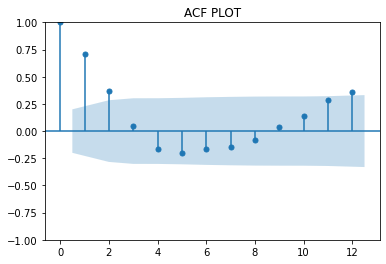

In [33]:
plt.figure(figsize=(25,18))
tsa_plots.plot_acf(Residuals1, lags = 12)
plt.title("ACF PLOT")
plt.show()

Plotting the PACF plot. 

C:\Users\lenny\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

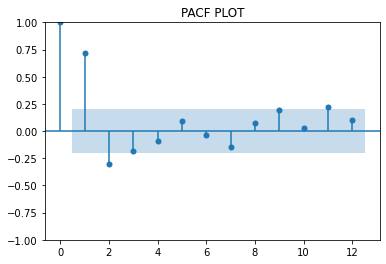

In [34]:
plt.figure(figsize=(15,8))
tsa_plots.plot_pacf(Residuals1, lags = 12)
plt.title("PACF PLOT")
plt.show()

From the acf and pacf plot we can see that lag1 is the best option. 

Importing the library required to build the AR model.

In [35]:
from statsmodels.tsa.ar_model import AutoReg

Building the model on the first set of residuals obtained from the Additive seasonality with quadratic trend model. 

In [36]:
model_ar = AutoReg(Residuals1, lags=[1])

Fitting the model. 

In [37]:
model_fit = model_ar.fit()

Checking the coefficients of the model. 

In [38]:
print('Coefficients: %s' % model_fit.params)

Coefficients: const   -0.208924
y.L1     0.718698
dtype: float64


Predicting the errors using the autoregression model. 

In [39]:
pred_res = model_fit.predict()
pred_res.reset_index(drop=True, inplace=True)
pred_res

0           NaN
1      7.119793
2     12.211884
3      2.211313
4      4.967635
        ...    
91    29.346108
92    24.164179
93     7.842428
94    -7.850462
95   -15.907183
Length: 96, dtype: float64

The predicted errors are then added to the forecasted data and saved to another variable called forecasted_passenger2.

In [40]:
Forecasted_Passengers2 = df1.Forecasted_Passengers1 + pred_res
Forecasted_Passengers2

0            NaN
1     107.837424
2     140.844356
3     124.008625
4     125.804788
         ...    
91    400.433261
92    367.961491
93    324.474900
94    284.992169
95    303.520607
Length: 96, dtype: float64

In [41]:
df1["Forecasted_Passengers2"] = pd.Series(Forecasted_Passengers2)
df1.head(5)

,Month,Passengers,months,t,t_square,log_Passengers,April,August,December,February,January,July,June,March,May,November,October,September,Forecasted_Passengers1,Forecasted_Passengers2
0,1995-01-01,112,January,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0,101.802790,NaN
1,1995-02-01,118,February,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0,100.717631,107.837424
2,1995-03-01,132,March,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0,128.632471,140.844356
3,1995-04-01,129,April,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0,121.797312,124.008625
4,1995-05-01,121,May,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0,120.837153,125.804788


Dropping the nan value from the dataset using the dropna function of the pandas library. 

In [42]:
df1.dropna(inplace=True)

The RMSE value is calculated to check the improvement in the data after filtering the residuals. 

In [43]:
rmse1 = np.sqrt(np.mean((np.array(df1["Passengers"]) - np.array(df1["Forecasted_Passengers2"]))**2))
rmse1

9.419080161723718

From the rmse we can see that it is very low which is very helpful in forecasting the data accurately. 

Predicting the next 60 months error using the same auto regression model. 

In [44]:
new_residuals = model_fit.predict(start=len(df1), end=len(df1)+60-1, dynamic=False)
new_residuals.reset_index(drop=True, inplace=True)
new_residuals

0    -15.907183
1     -9.859453
2     -7.294895
3     -5.451751
4     -4.127087
5     -3.175054
6     -2.490829
7     -1.999078
8     -1.645657
9     -1.391655
10    -1.209103
11    -1.077904
12    -0.983611
13    -0.915843
14    -0.867138
15    -0.832134
16    -0.806977
17    -0.788897
18    -0.775902
19    -0.766563
20    -0.759851
21    -0.755027
22    -0.751560
23    -0.749069
24    -0.747278
25    -0.745991
26    -0.745066
27    -0.744401
28    -0.743923
29    -0.743580
30    -0.743333
31    -0.743156
32    -0.743028
33    -0.742937
34    -0.742871
35    -0.742823
36    -0.742789
37    -0.742765
38    -0.742747
39    -0.742735
40    -0.742726
41    -0.742719
42    -0.742715
43    -0.742711
44    -0.742709
45    -0.742707
46    -0.742706
47    -0.742705
48    -0.742704
49    -0.742704
50    -0.742703
51    -0.742703
52    -0.742703
53    -0.742703
54    -0.742703
55    -0.742703
56    -0.742703
57    -0.742703
58    -0.742703
59    -0.742703
dtype: float64

The predicted errors are added to the passenger variable in the df_new dataset which has the forecasted passenger data. This data is then added as new passenger variable in the same dataframe. 

In [45]:
final_pred = df_new.Passengers + new_residuals
final_pred

0     312.421503
1     319.578725
2     352.252774
3     349.455408
4     352.014562
5     382.201087
6     410.869802
7     410.846044
8     384.183955
9     357.547449
10    334.214491
11    361.205181
12    370.474701
13    371.926291
14    402.358818
15    398.027644
16    399.561624
17    429.088526
18    457.360343
19    457.128504
20    430.394038
21    403.782683
22    380.544972
23    407.681286
24    417.132636
25    418.792076
26    449.451154
27    445.359972
28    447.143603
29    476.927100
30    505.460500
31    505.493831
32    479.027112
33    452.685356
34    429.718576
35    457.126776
36    466.850700
37    468.783209
38    499.715712
39    495.898209
40    497.955702
41    528.013193
42    556.820683
43    557.128170
44    530.935657
45    504.868144
46    482.175630
47    509.858115
48    519.856337
49    522.063153
50    553.269970
51    549.726786
52    552.058602
53    582.390418
54    611.472233
55    612.054049
56    586.135865
57    560.342681
58    537.9244

In [46]:
df_new['New_Passengers']=pd.Series(final_pred)
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_33980\2229365985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['New_Passengers']=pd.Series(final_pred)


,April,August,December,February,January,July,June,March,May,November,October,September,t,t_square,Passengers,New_Passengers
0,0,0,0,0,1,0,0,0,0,0,0,0,97,9409,328.328687,312.421503
1,0,0,0,1,0,0,0,0,0,0,0,0,98,9604,329.438178,319.578725
2,0,0,0,0,0,0,0,1,0,0,0,0,99,9801,359.547668,352.252774
3,1,0,0,0,0,0,0,0,0,0,0,0,100,10000,354.907159,349.455408
4,0,0,0,0,0,0,0,0,1,0,0,0,101,10201,356.141650,352.014562


### CONCLUSION

Thus the next 5 years passenger data is forecasted using both Additive Seasonality Quadratic trend model and AutoRegression(1) model. The various models are checked and their rmse values are also documented. There are total 12 dummy variables used from January to December as the seasonality is 12 as the time series is based on month data. 

From the forecast we can see that there is a steady increase in the number of passengers over the years. 